In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import warnings
import pickle
from sklearn.model_selection import train_test_split

In [3]:
path = r"C:\Users\49171\Desktop\Graph-Database-Learning-Algorithms-Neo4j-\Heart Failure Prediction\Heart Failure Prediction.csv"
df = pd.read_csv(path)
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [4]:
df.shape

(299, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [7]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

c:\users\49171\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


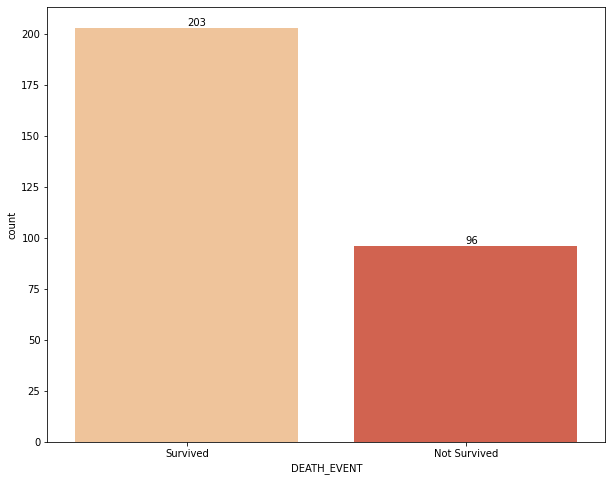

In [8]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['DEATH_EVENT'], palette='OrRd')
ax.set_xticklabels(['Survived','Not Survived'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

In [9]:
sources_pie = go.Pie( values=df.DEATH_EVENT.value_counts())

layout = go.Layout(height = 600,
                   width = 800,
                   autosize = False,
                   title = 'Death Event')
fig = go.Figure(data = [sources_pie], layout = layout)
fig.show()

In [10]:
import plotly.express as px
import plotly.figure_factory as ff
fig = px.histogram(df, x="age")
fig.show()

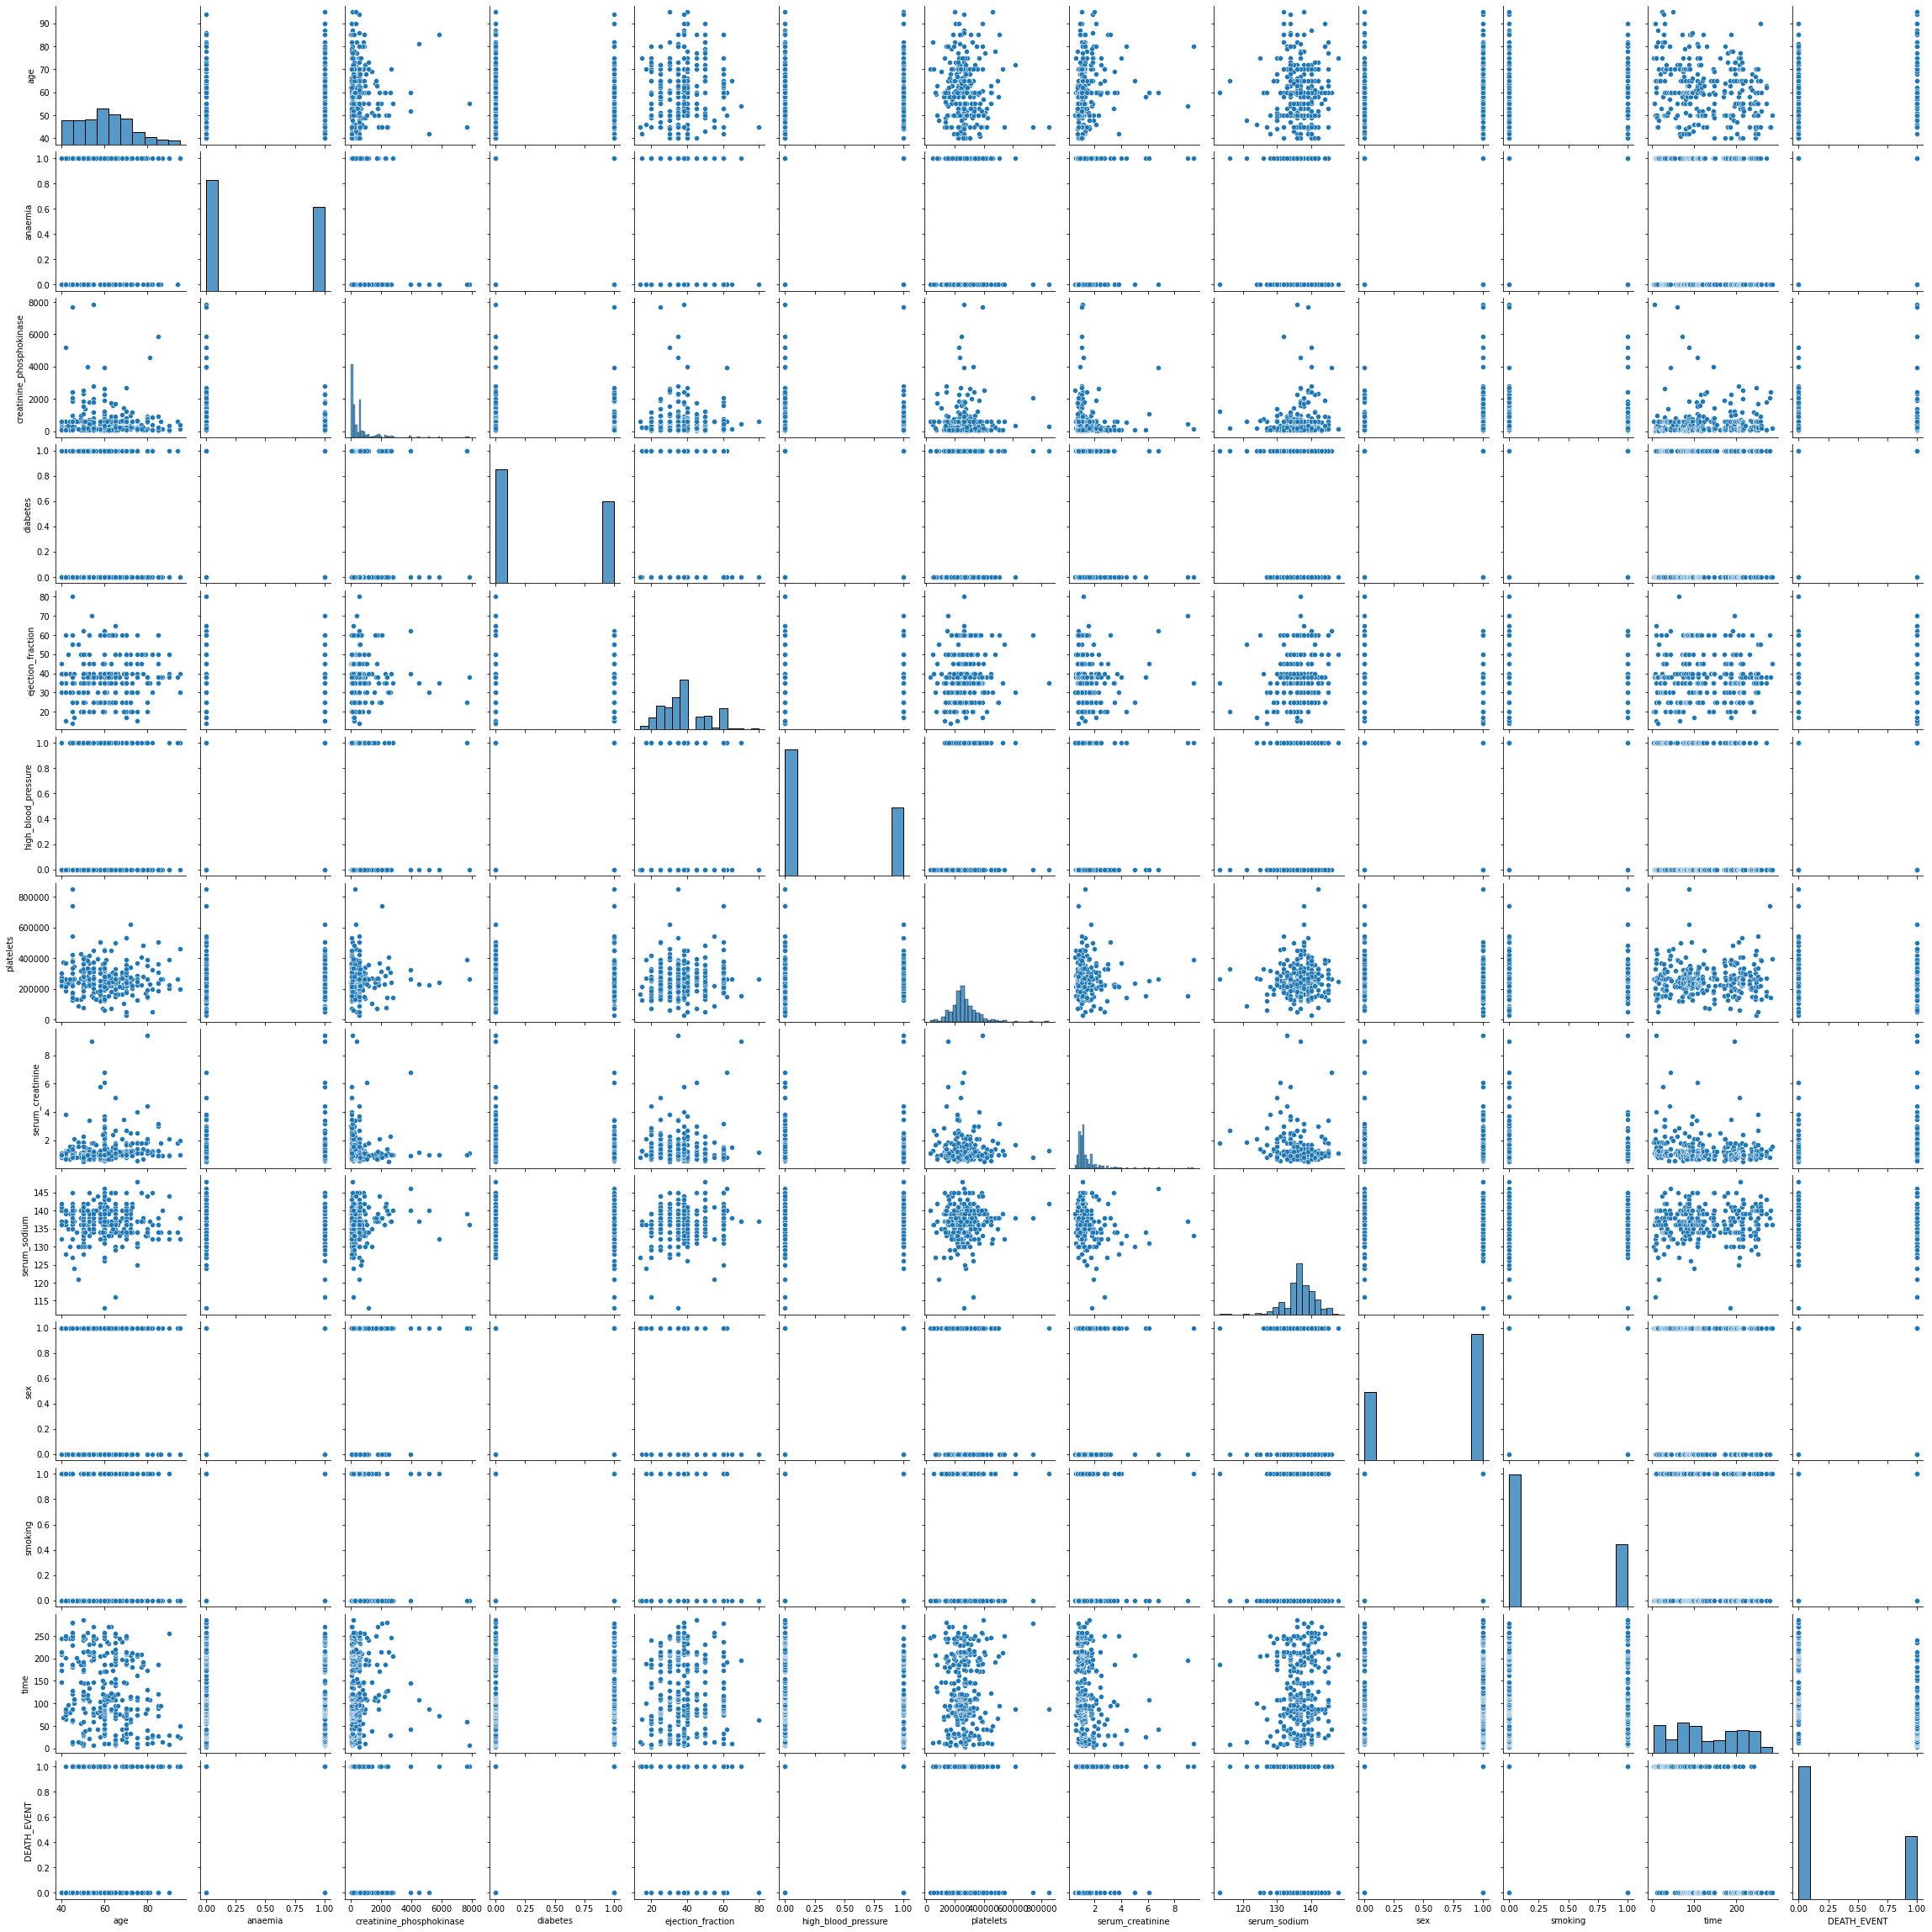

In [11]:
sns.pairplot(df)

In [12]:
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y = df['DEATH_EVENT']

In [13]:
X.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  
0        0     4  
1        0     6  
2        1     7  
3        0     7  
4        0     8

In [14]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [15]:
path = r"C:\Users\49171\Desktop\Graph-Database-Learning-Algorithms-Neo4j-\Heart Failure Prediction\Training Dataset.csv"
dfTrain = pd.read_csv(path)
dfTrain.head()

Unnamed: 0   age  anaemia  creatinine_phosphokinase  diabetes  \
0           1  75.0        0                       582         0   
1           3  65.0        0                       146         0   
2           4  50.0        1                       111         0   
3           6  90.0        1                        47         0   
4           7  75.0        1                       246         0   

   ejection_fraction  high_blood_pressure  platelets  serum_creatinine  \
0                 20                    1   265000.0               1.9   
1                 20                    0   162000.0               1.3   
2                 20                    0   210000.0               1.9   
3                 40                    1   204000.0               2.1   
4                 15                    0   127000.0               1.2   

   serum_sodium  sex  smoking  time  DEATH_EVENT  
0           130    1        0     4            1  
1           129    1        1     7            1  
2           137    1        0     7            1  
3           132    1        1     8            1  
4           137    1        0    10            1

In [16]:
dfTrain.shape

(202, 14)

In [17]:
x_train = dfTrain[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y_train = dfTrain['DEATH_EVENT']

In [18]:
path = r"C:\Users\49171\Desktop\Graph-Database-Learning-Algorithms-Neo4j-\Heart Failure Prediction\Testing Dataset.csv"
dfTest = pd.read_csv(path)
dfTest.head()

Unnamed: 0   age  anaemia  creatinine_phosphokinase  diabetes  \
0           2  55.0        0                      7861         0   
1           5  65.0        1                       160         1   
2          16  82.0        1                       379         0   
3          20  48.0        1                       582         1   
4          21  65.0        1                        52         0   

   ejection_fraction  high_blood_pressure  platelets  serum_creatinine  \
0                 38                    0  263358.03               1.1   
1                 20                    0  327000.00               2.7   
2                 50                    0   47000.00               1.3   
3                 55                    0   87000.00               1.9   
4                 25                    1  276000.00               1.3   

   serum_sodium  sex  smoking  time  DEATH_EVENT  
0           136    1        0     6            1  
1           116    0        0     8            1  
2           136    1        0    13            1  
3           121    0        0    15            1  
4           137    0        0    16            0

In [19]:
dfTest.shape

(97, 14)

In [20]:
x_test = dfTest[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
y_test = dfTest['DEATH_EVENT']

In [21]:
x_test.shape, y_test.shape

((97, 12), (97,))

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.tree import plot_tree

In [23]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5)

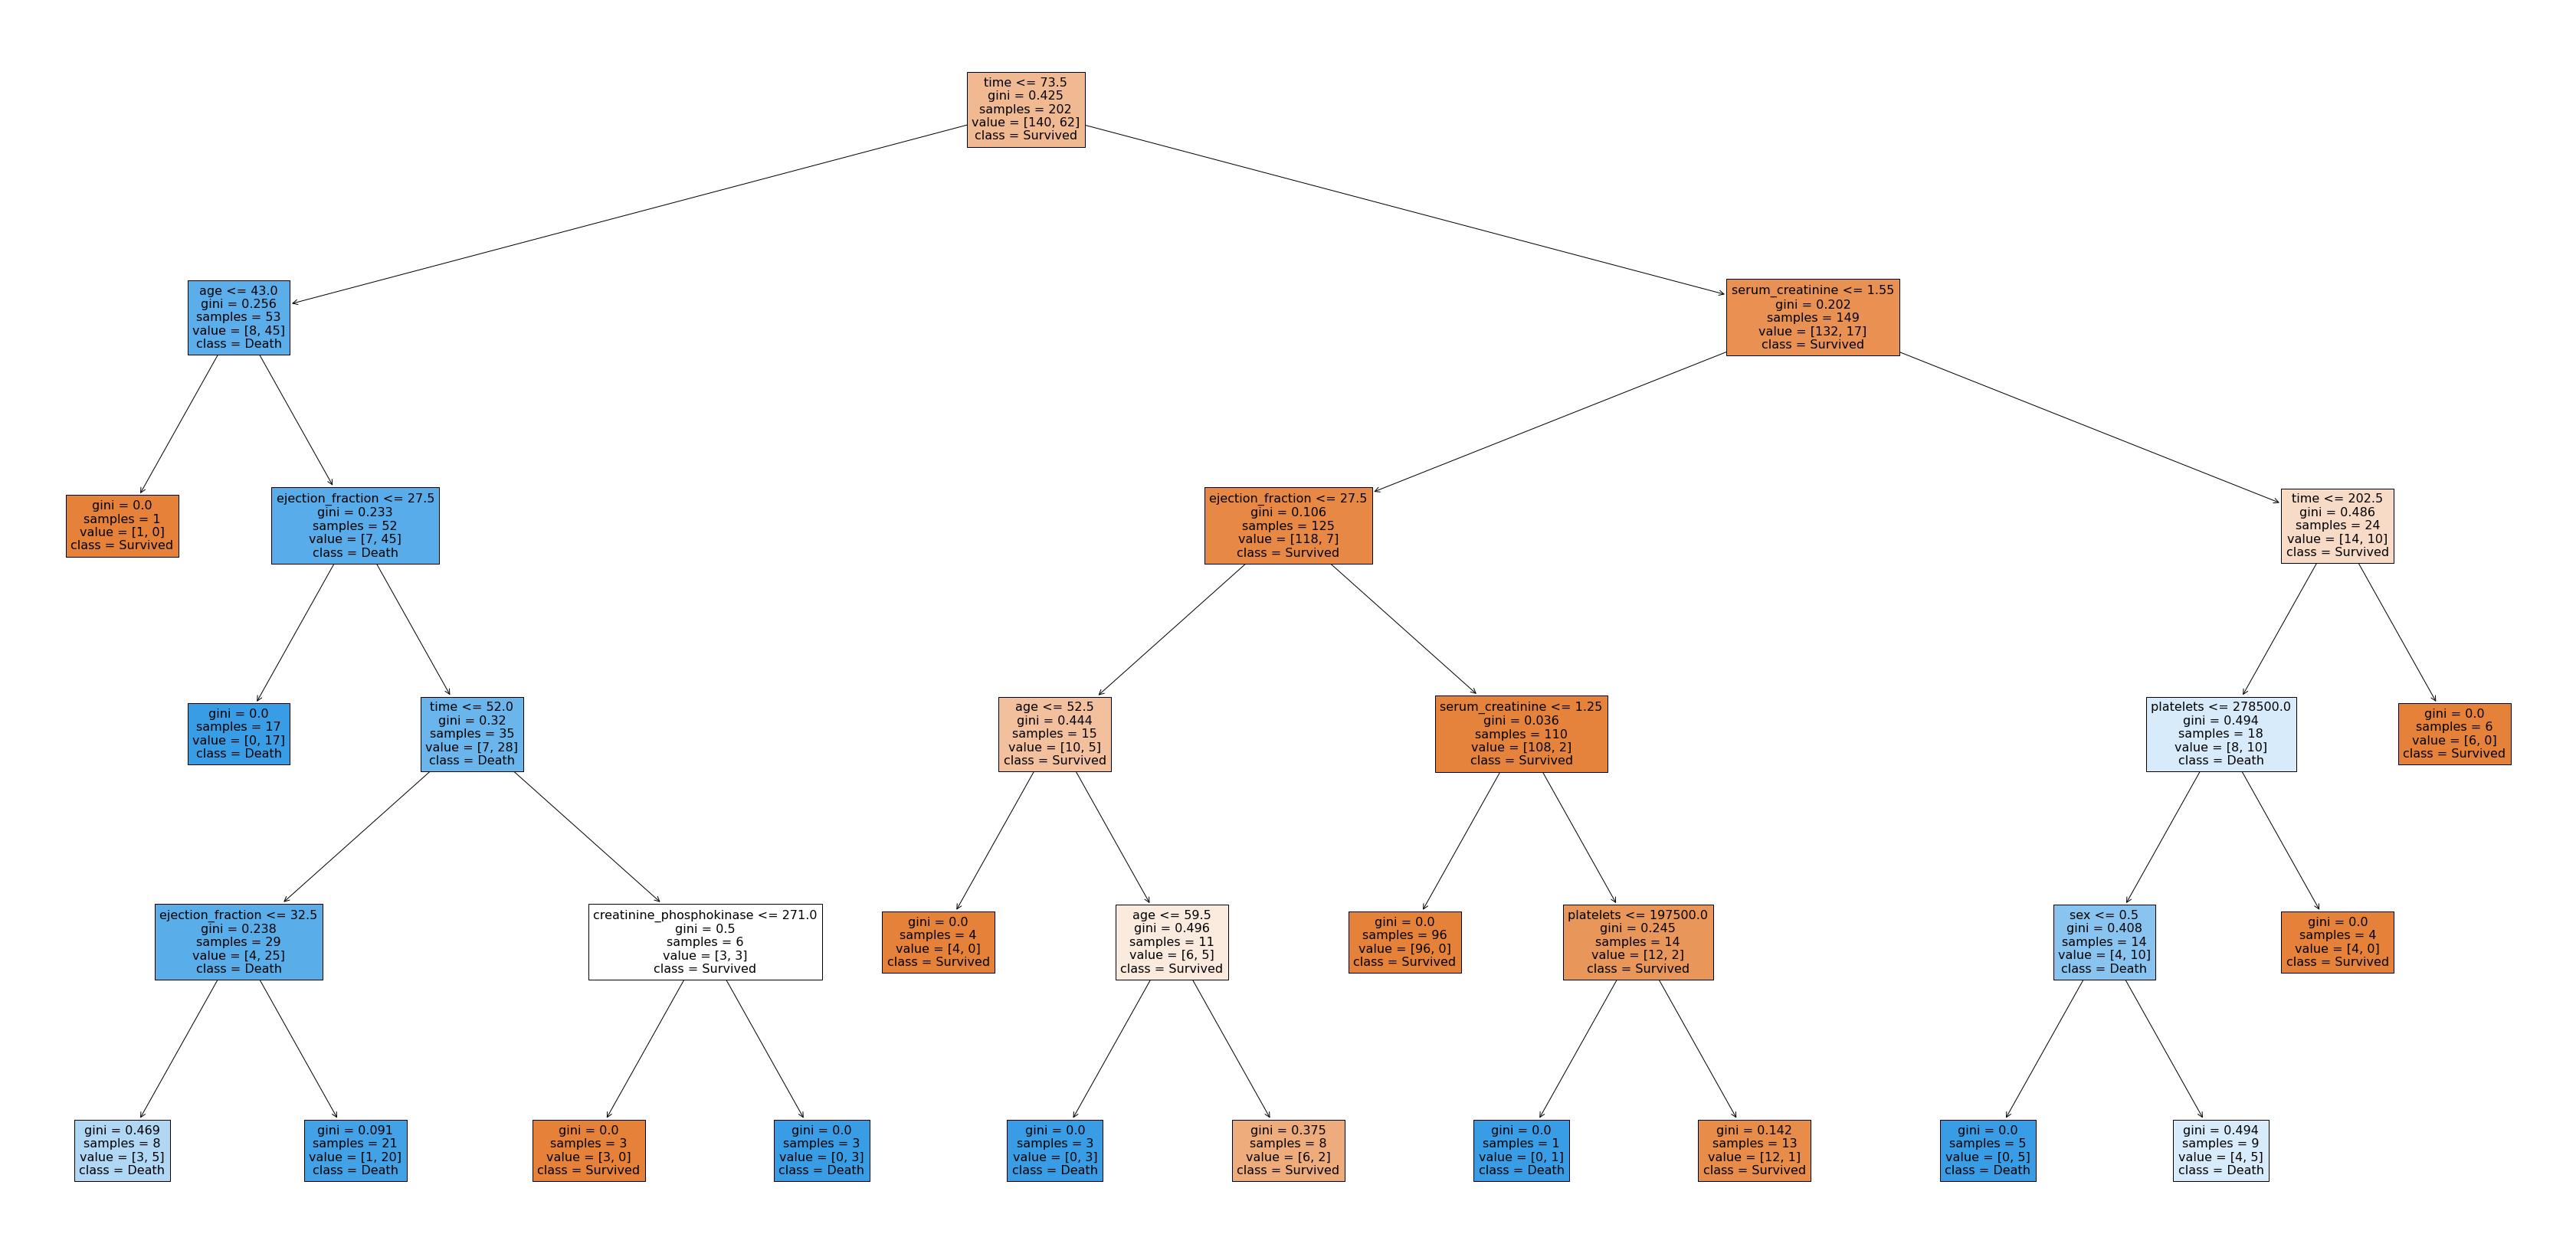

In [24]:
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['Survived', "Death"],filled=True);

In [25]:
y_train_pred = dt.predict(x_train)
y_test_pred = dt.predict(x_test)

In [26]:
results = confusion_matrix(y_train, y_train_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)


TN  132
TP  59
FN  3
FP  8
[[132   8]
 [  3  59]]


In [27]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)


TN  50
TP  22
FN  12
FP  13
[[50 13]
 [12 22]]


In [29]:
accuracy_score(y_test, y_test_pred) # Jaccard

0.7422680412371134

In [31]:
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,30):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_gini.append(accuracy_score(y_test, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_test)
 acc_entropy.append(accuracy_score(y_test, pred))
 ####
 max_depth.append(i)

In [32]:
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

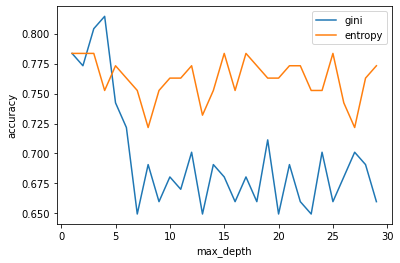

In [33]:
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

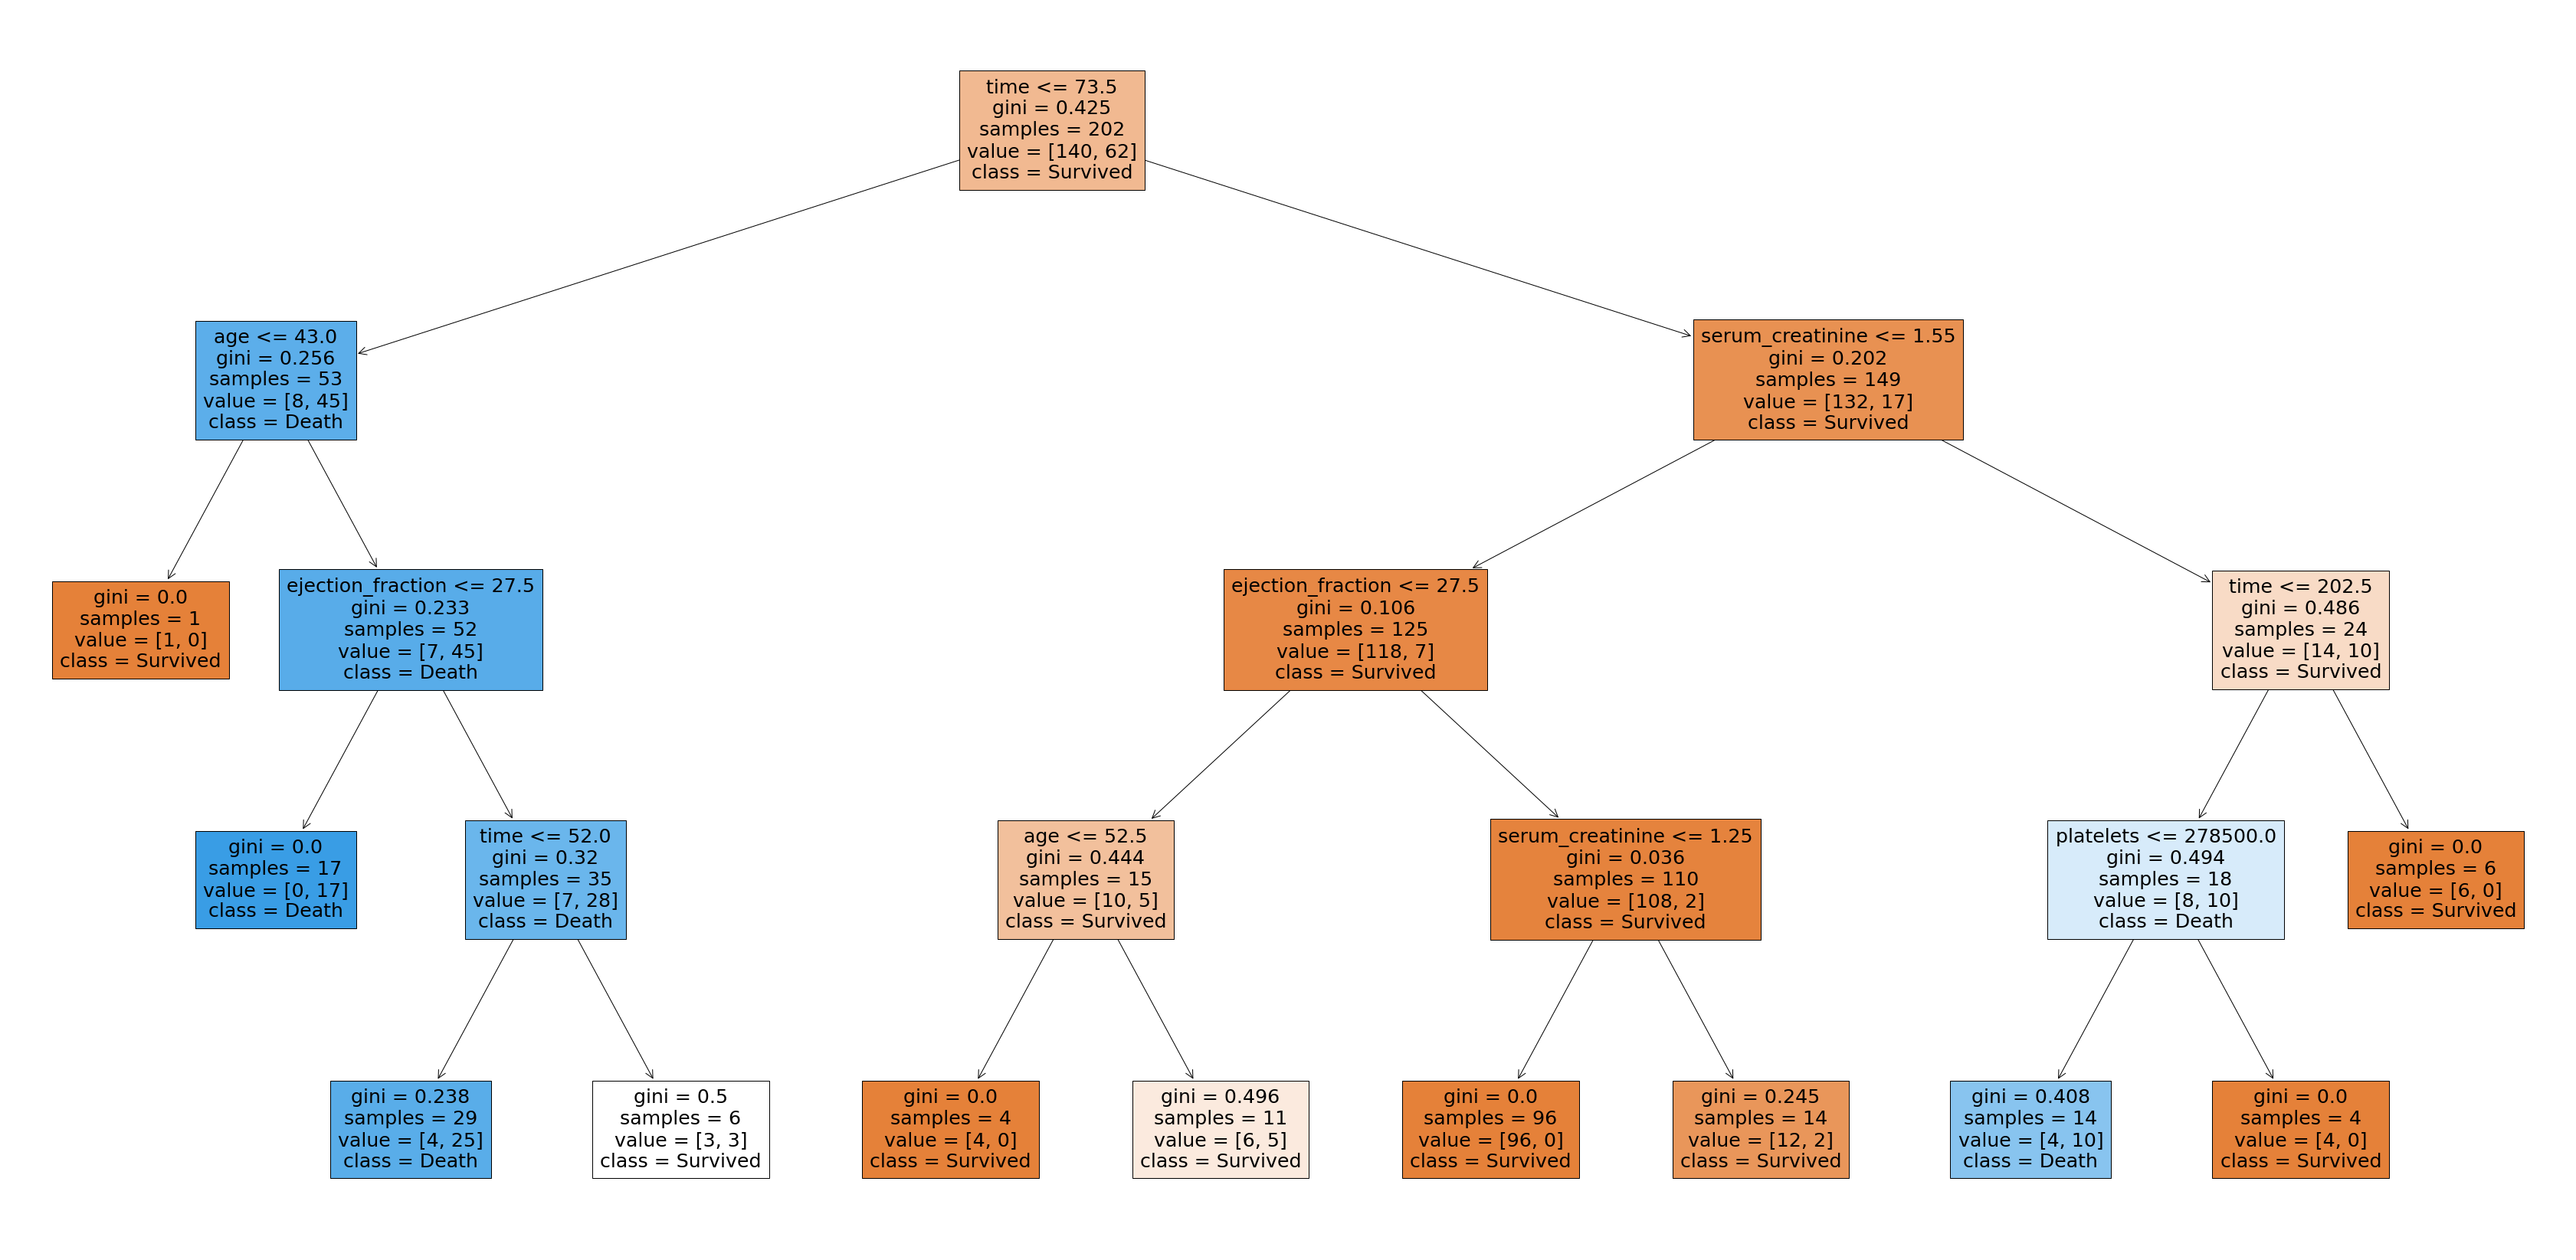

In [43]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train, y_train)
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['Survived', "Death"],filled=True);

In [44]:
y_test_pred = dt.predict(x_test)
cf = confusion_matrix(y_test, y_test_pred)
cf

array([[58,  5],
       [13, 21]], dtype=int64)

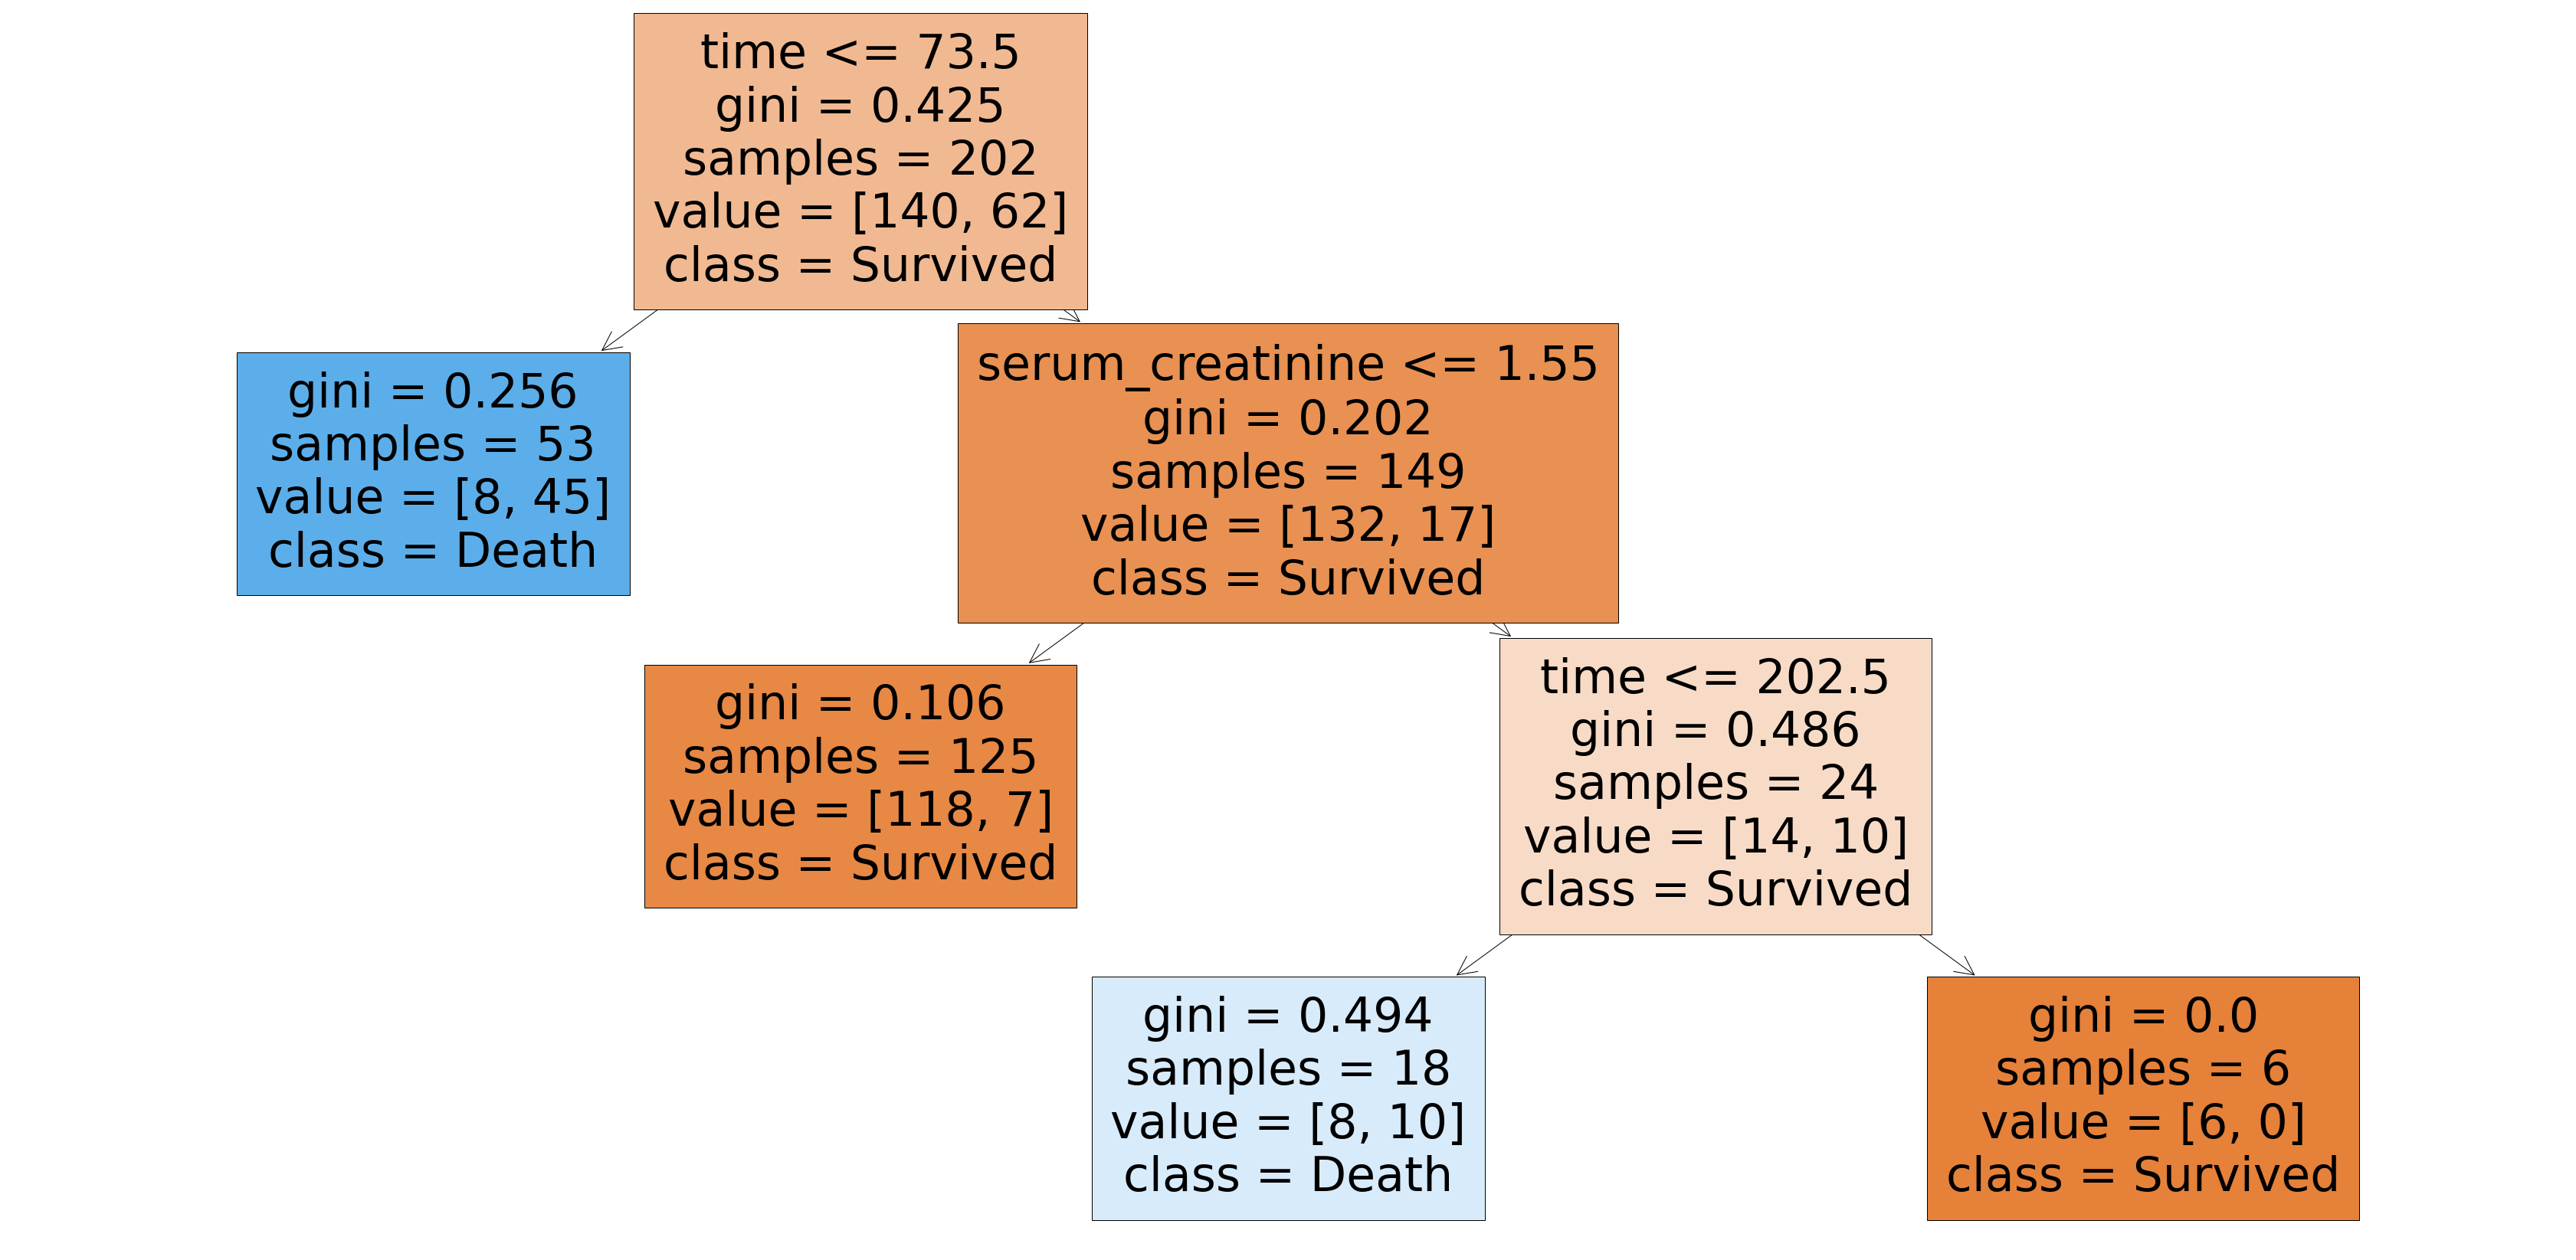

In [36]:
dt = DecisionTreeClassifier(max_leaf_nodes=4)
dt.fit(x_train, y_train)
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['Survived', "Death"],filled=True);

In [37]:
y_test_pred = dt.predict(x_test)
cf = confusion_matrix(y_test, y_test_pred)
cf

array([[54,  9],
       [ 9, 25]], dtype=int64)

In [38]:
dt = DecisionTreeClassifier(criterion="entropy")
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

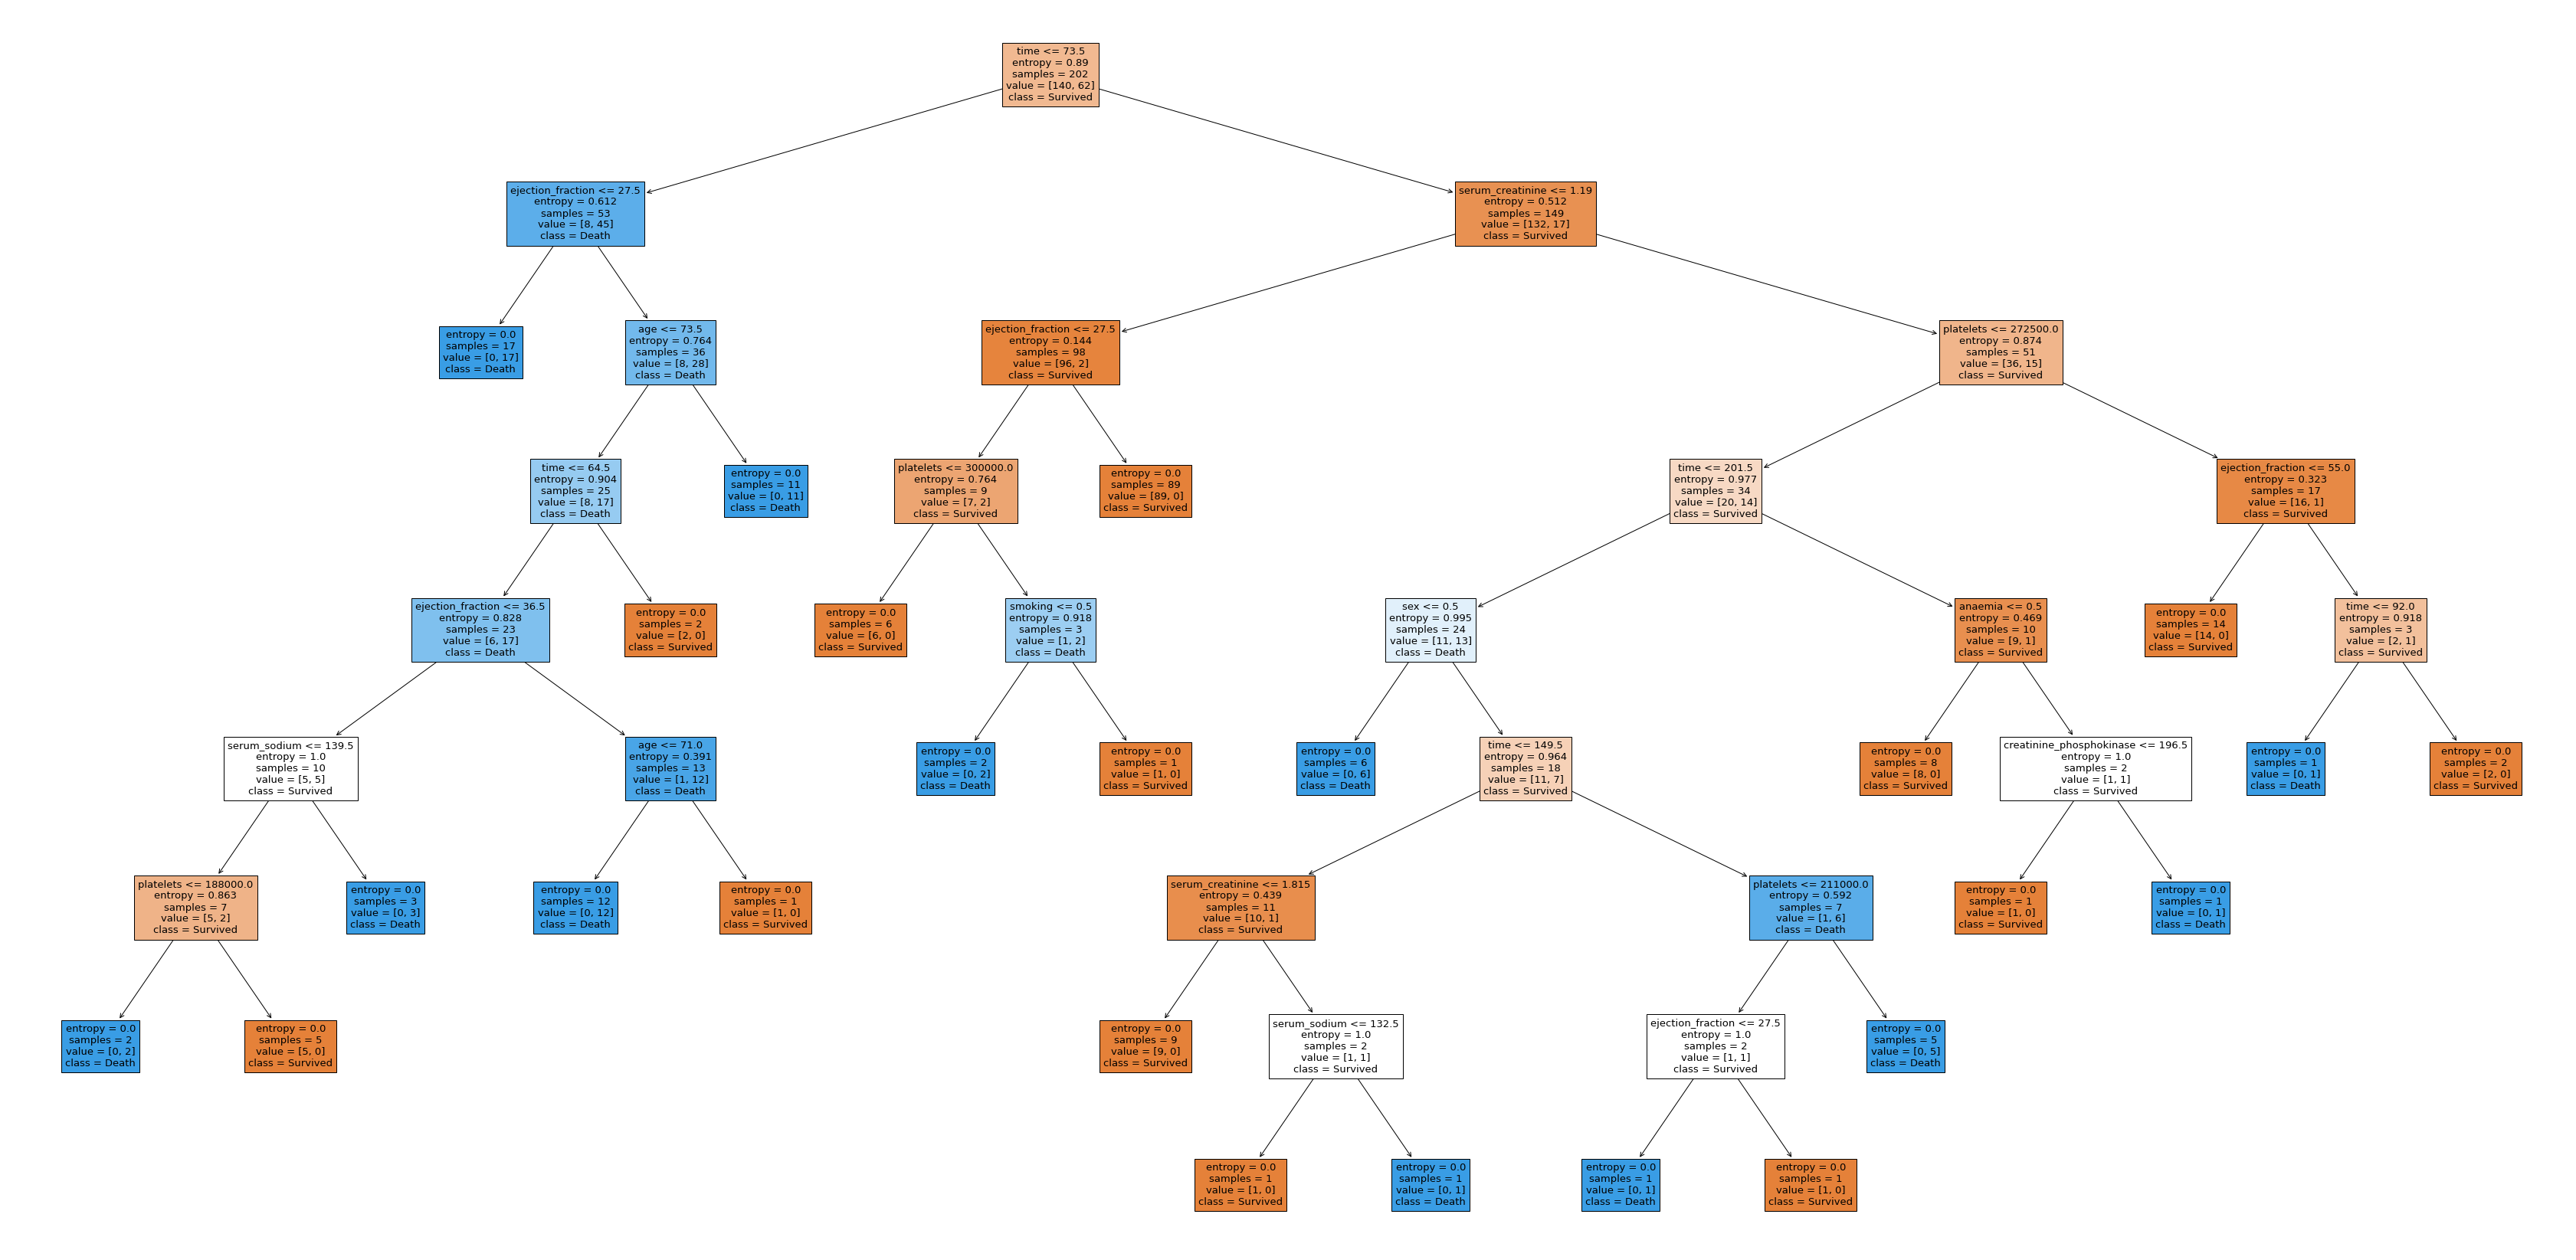

In [39]:
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['Survived', "Death"],filled=True);

In [46]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

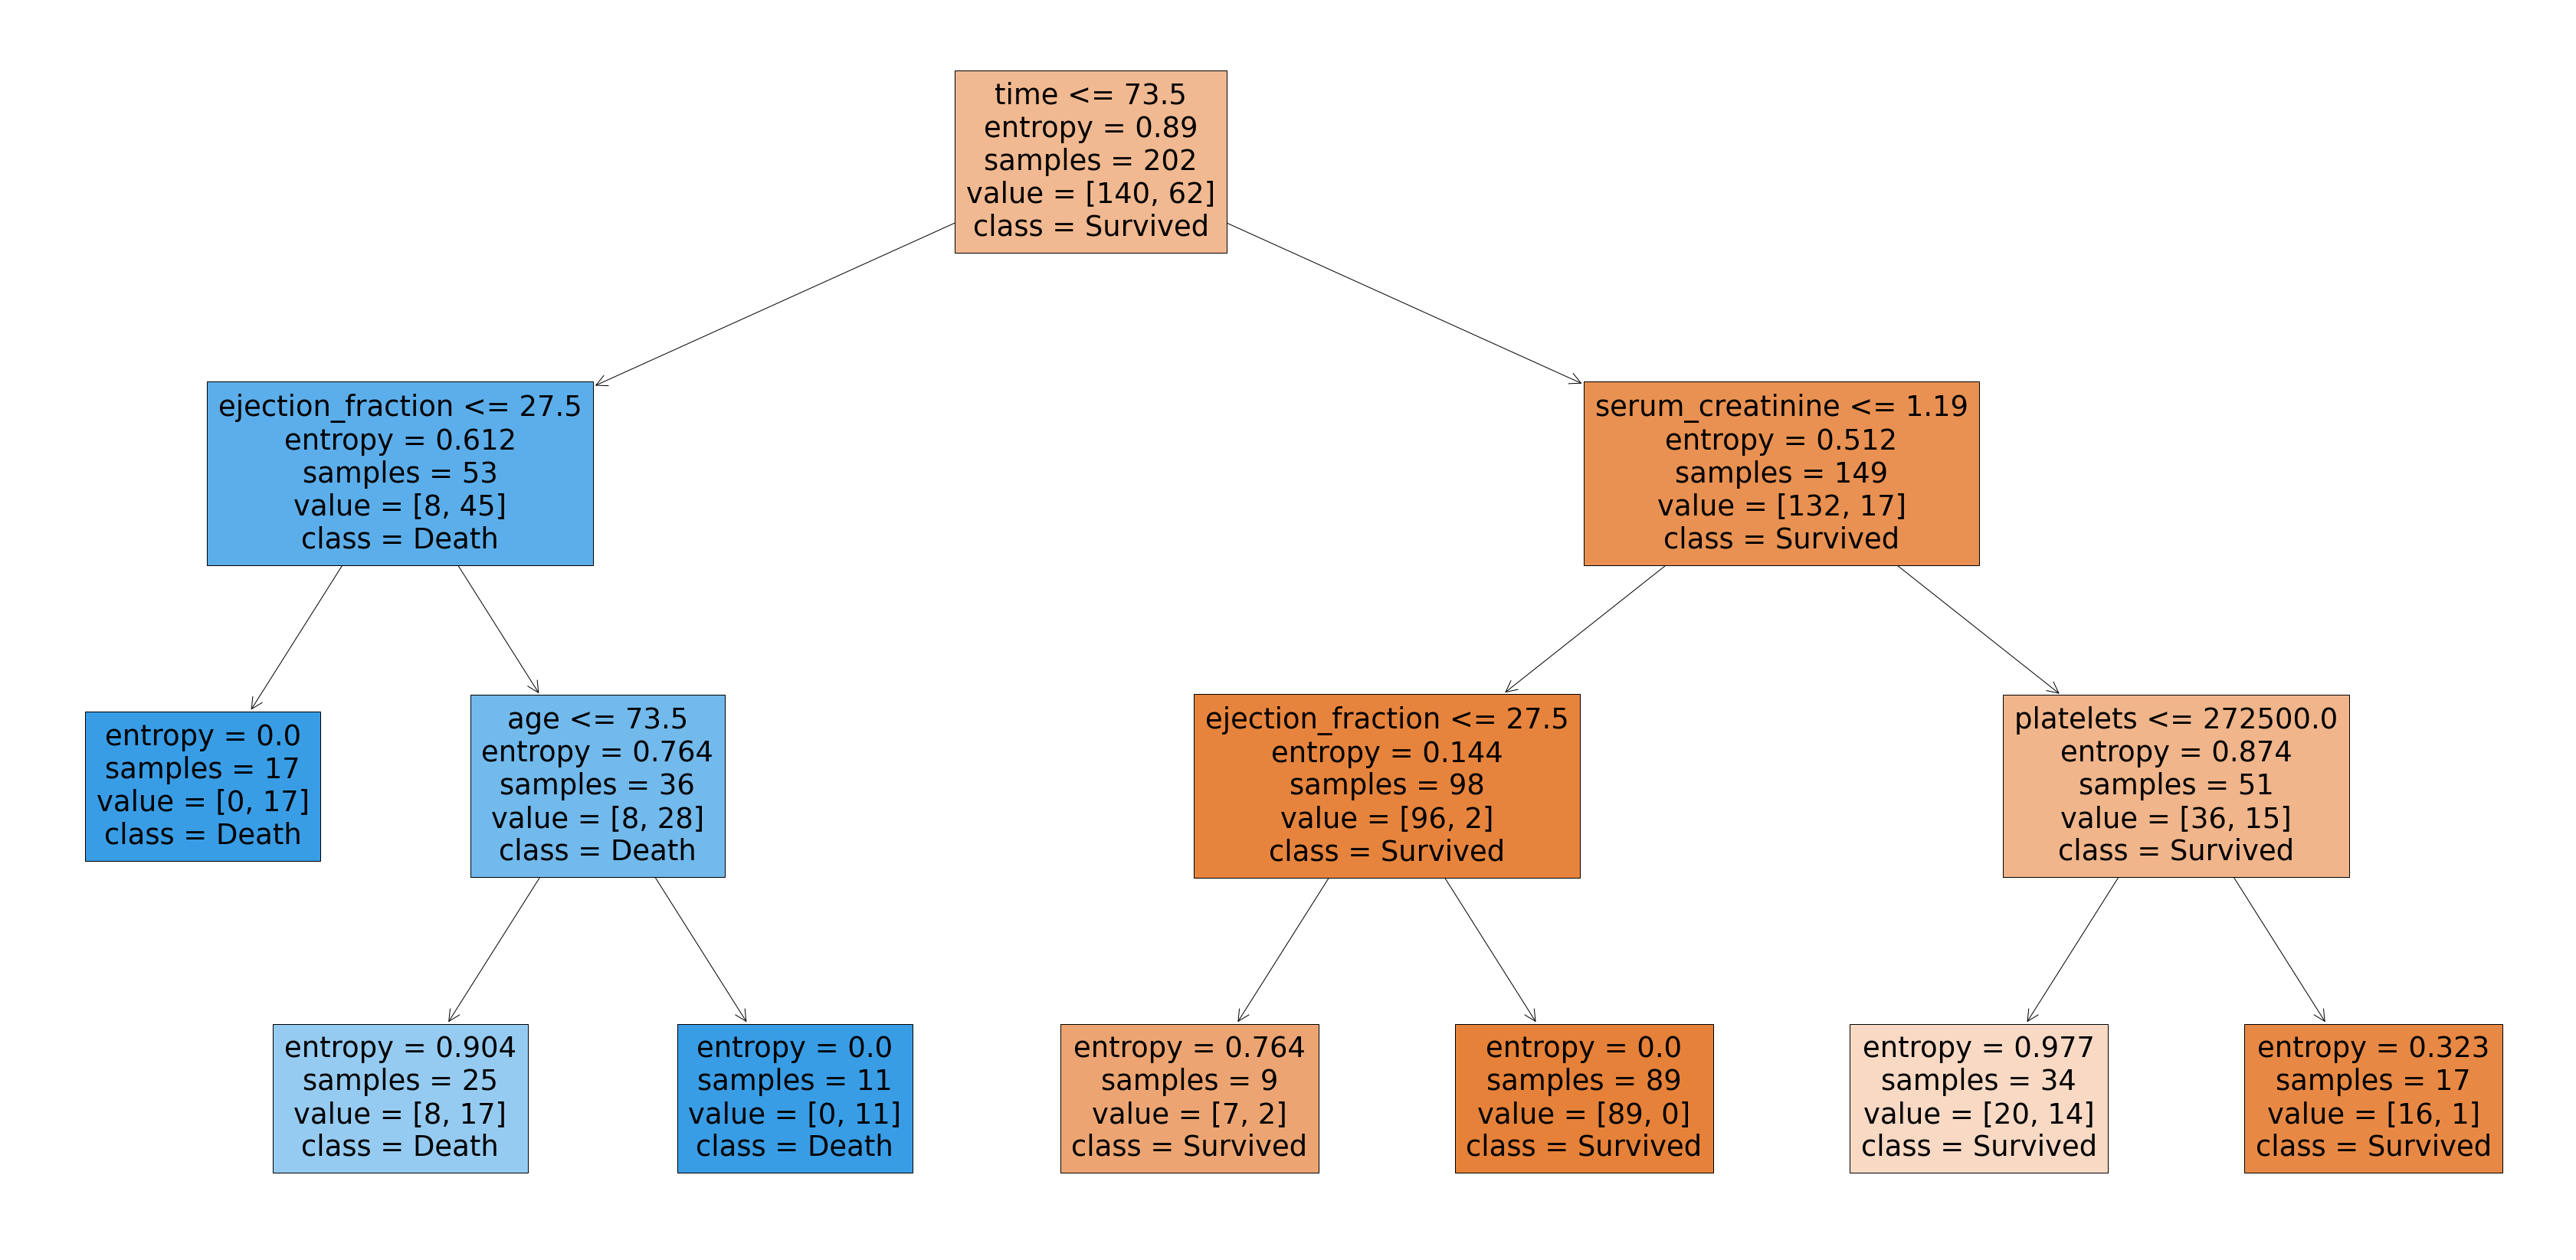

In [47]:
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['Survived', "Death"],filled=True);

In [48]:
dt = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = 4)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=4)

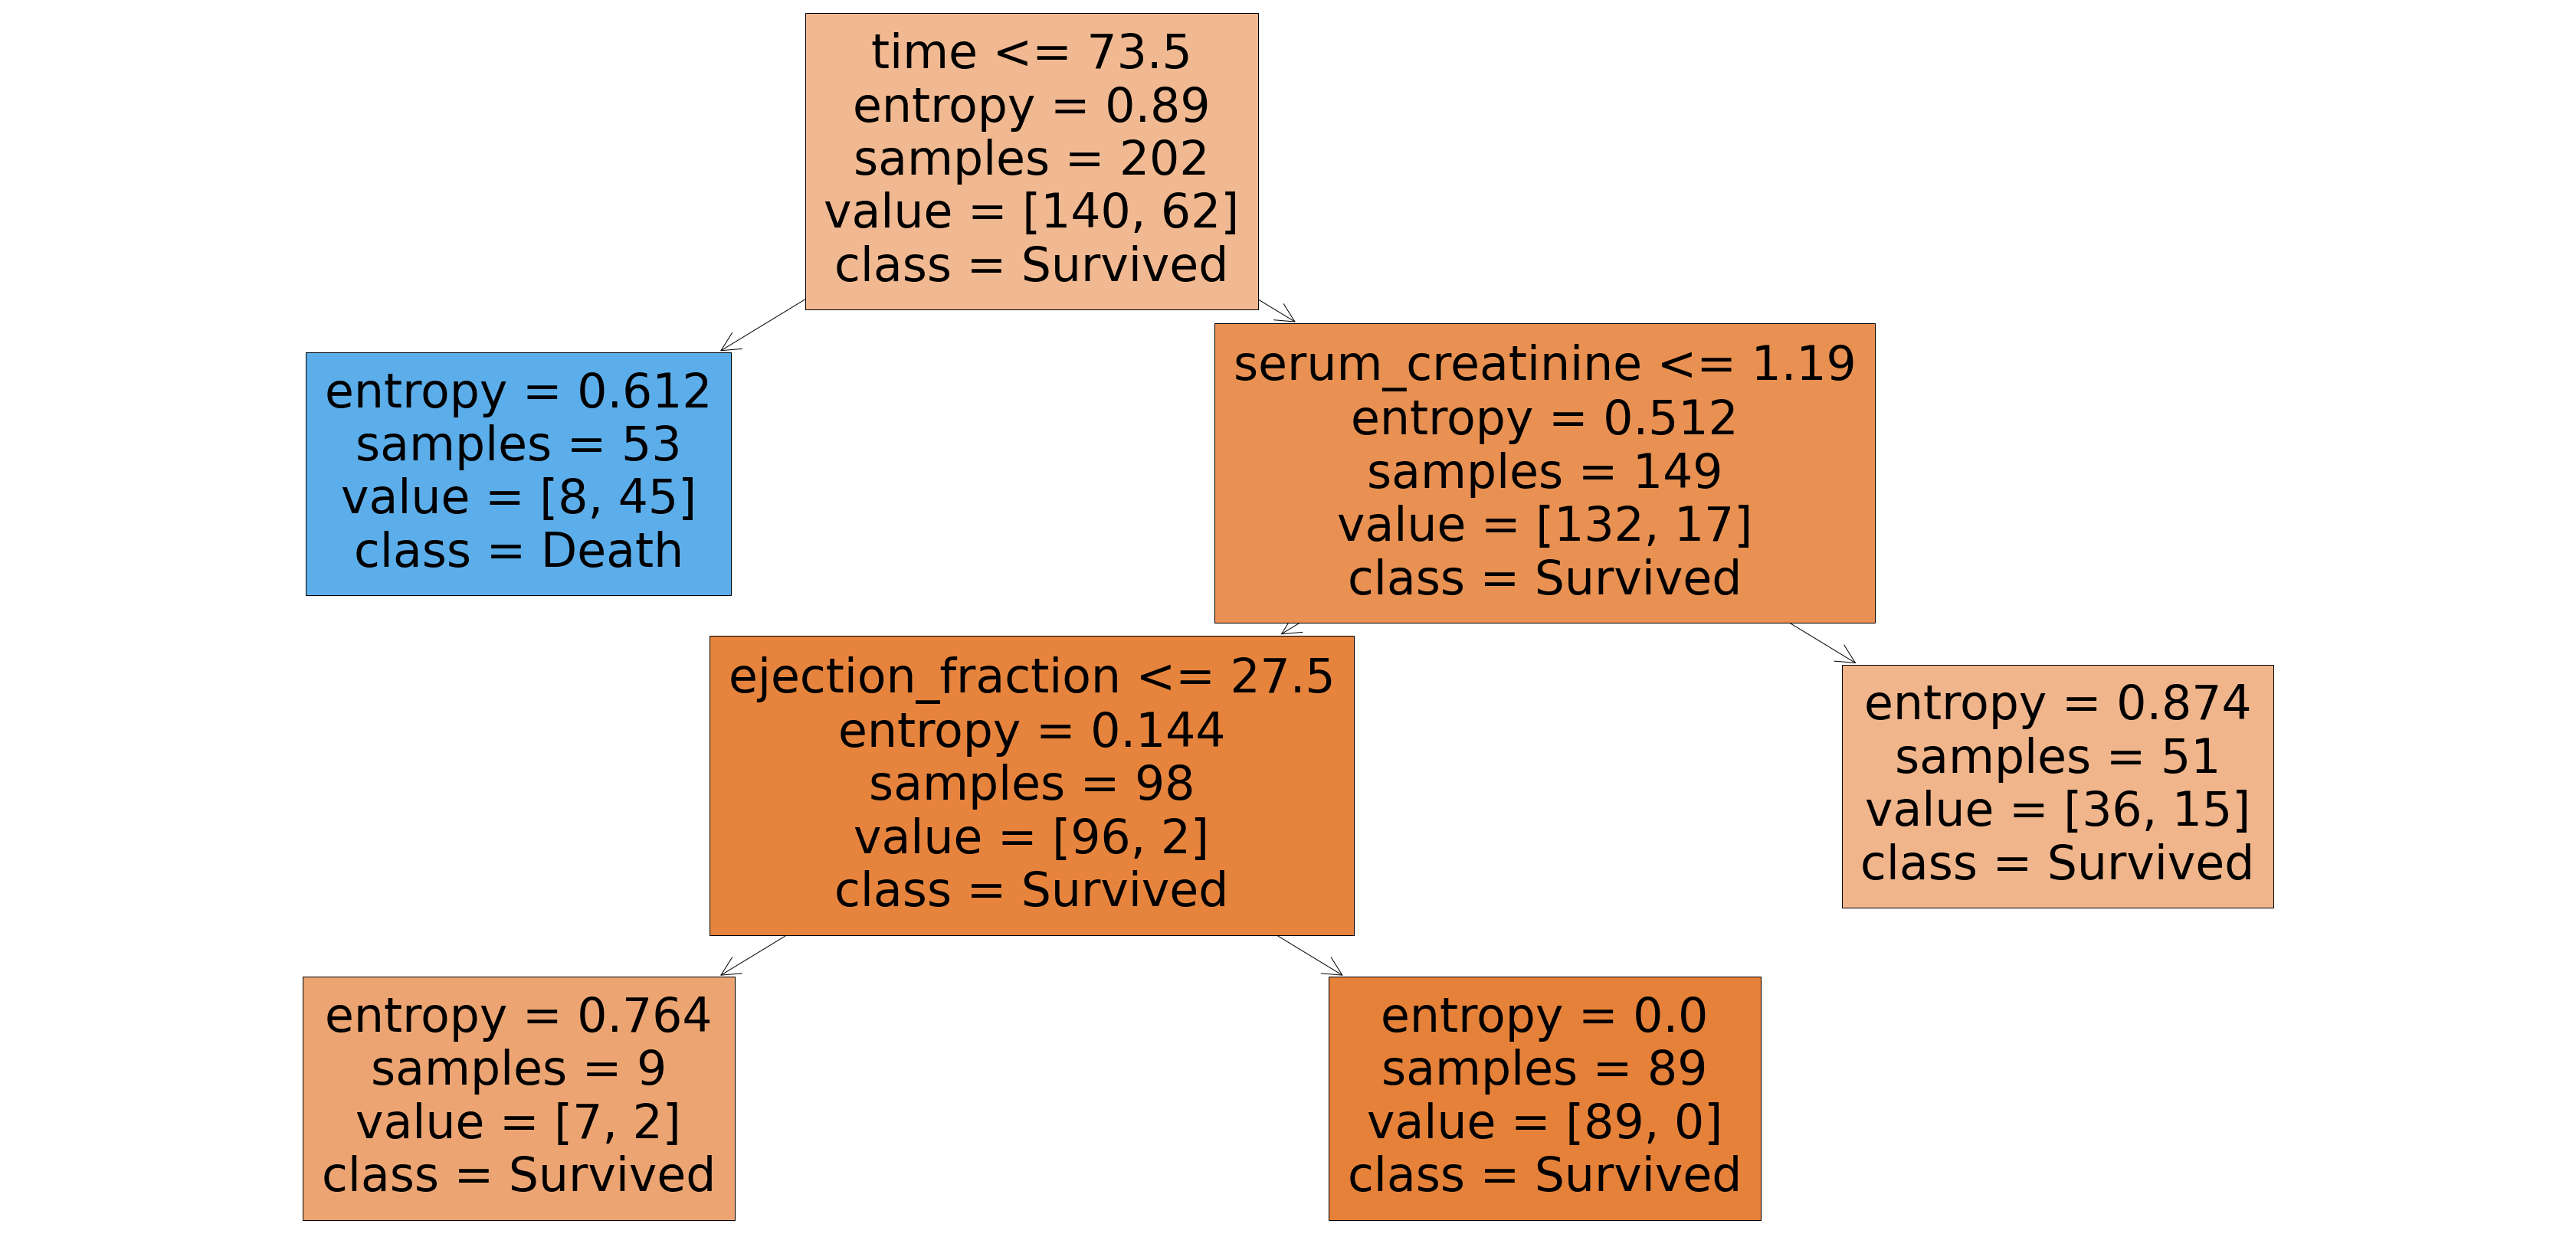

In [49]:
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['Survived', "Death"],filled=True);